In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train_data = pd.read_csv('train.csv',header=0)
test_data = pd.read_csv('test.csv',header=0)

In [4]:
Label=train_data.pop('label')

In [5]:
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data_images = np.reshape(train_data.values, (-1,28,28,1))

In [7]:
train_data_images = train_data_images/np.max(train_data_images)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (train_data_images,Label,test_size = 0.2,random_state=42)

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
def Digit_Recogniser_model():
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(10,activation='softmax')
    ]) 
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    return model

In [11]:
model = Digit_Recogniser_model()

In [12]:
history = model.fit(X_train, y_train, epochs = 10,validation_data=(X_test,y_test))

Epoch 1/10
1050/1050 [==============================] - 47s 42ms/step - loss: 0.1896 - accuracy: 0.9400 - val_loss: 0.0558 - val_accuracy: 0.9829
Epoch 2/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0642 - accuracy: 0.9810 - val_loss: 0.0412 - val_accuracy: 0.9883
Epoch 3/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 4/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 5/10
1050/1050 [==============================] - 55s 52ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0323 - val_accuracy: 0.9901
Epoch 6/10
1050/1050 [==============================] - 53s 50ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0336 - val_accuracy: 0.9905
Epoch 7/10
1050/1050 [==============================] - 49s 47ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0359 -

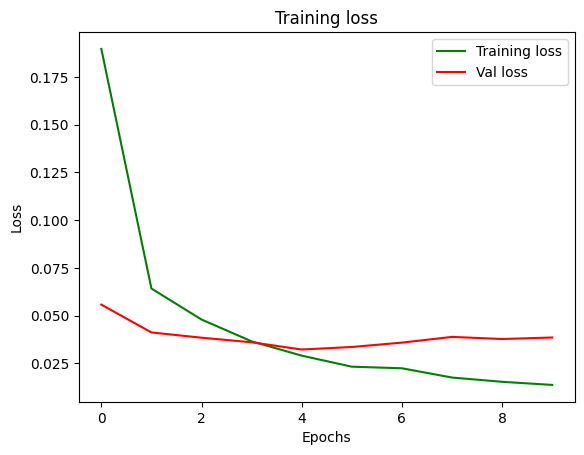

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'r', label='Val loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
test_data_images = np.reshape(test_data.values, (-1,28,28,1))
test_data_images = test_data_images/np.max(test_data_images)

In [15]:
predicted_values_array = model.predict(test_data_images)
predicted_values = np.argmax(predicted_values_array,axis=1)

875/875 [==============================] - 9s 10ms/step


In [17]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': predicted_values})
submission.to_csv('submission.csv', index=False)